In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/R9. auto-insurance.csv', header=None, names=['Number_of_Claims', 'Total_Payment'])

# Splitting the dataset into training and test sets
X = data[['Number_of_Claims']]
y = data['Total_Payment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_Y.transform(y_test.values.reshape(-1, 1)).flatten()

# Create an MLPRegressor model
mlp = MLPRegressor(hidden_layer_sizes=(64, 32, 16),
                   activation='relu',
                   solver='adam',
                   max_iter=1000,
                   random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = mlp.predict(X_test_scaled)

# Transform predictions back to original scale
y_pred = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")


Mean Squared Error on Test Data: 838.8021039835137


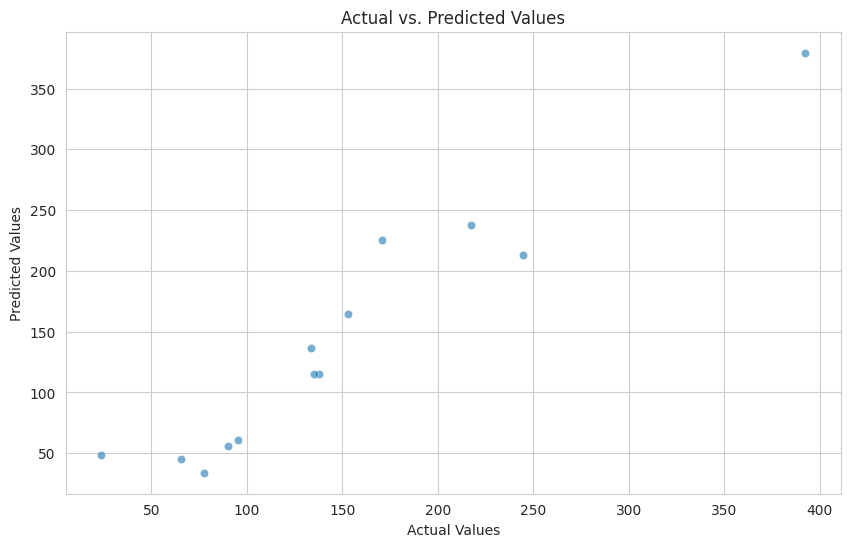

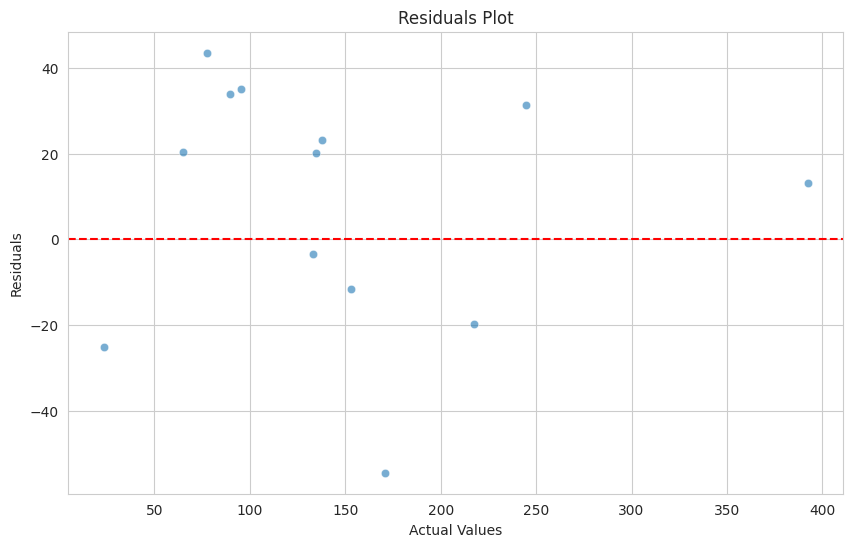

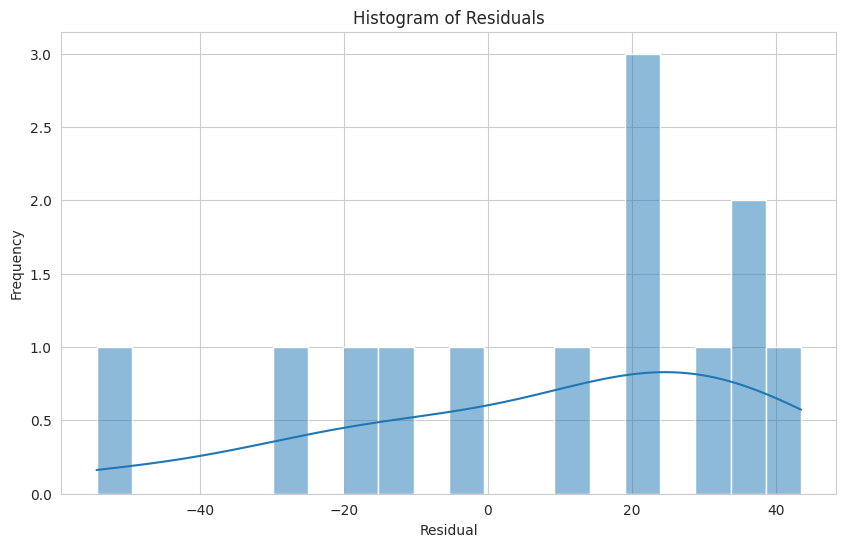

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set_style("whitegrid")

# 1. Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="w", linewidth=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# 2. Residuals Plot
# 2. Residuals Plot
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6, edgecolor="w", linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
